<a href="https://colab.research.google.com/github/DEADL0CKK/netflix_dataset/blob/main/netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bonjour moniseur,

Nous vous prions de nous excuser si notre travail est incomplet.
Alexandre et moi-même, Thomas, avons attrapé le COVID durant cette période de cours.
Avec la dégradation de notre état de santé, nous n'avons pas pu faire un travail complet.

En vous remerciant de votre attention.

# Gestion des imports pour le notebook



In [743]:
!pip install sklearn -U

In [744]:
!pip install mlxtend -U

In [745]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.model_selection import GridSearchCV

from matplotlib import pyplot as plt

from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_confusion_matrix

from pandas.plotting import scatter_matrix



# Préparation de notre DataFrame et de l'algorithme d'apprentissage

## Récupération du dataset sur le contenu du catalogue Netflix

In [746]:
# netflix = pd.read_csv(r'/content/drive/MyDrive/IPSSI/Machine_Learning/netflix-rotten-tomatoes-metacritic-imdb.csv')
netflix = pd.read_csv(r'/content/drive/MyDrive/IPSSI/Machine Learning/netflix-rotten-tomatoes-metacritic-imdb.csv')
print(netflix.columns)


Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')


## Supression des colonnes non utilisées

In [747]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site','Title'],axis=1)
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


 ## Utilisation de la fonction describe pour voir la structure de dataframe

In [748]:
df_netflix.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000
mean,5.937551,6.496054,59.523034,56.813653,8.764444
std,2.250202,1.146910,26.999173,17.582545,18.311171
min,0.600000,1.000000,0.000000,5.000000,1.000000
25%,3.800000,5.800000,38.000000,44.000000,1.000000
50%,6.800000,6.600000,64.000000,57.000000,3.000000
75%,7.900000,7.300000,83.000000,70.000000,8.000000
max,9.800000,9.700000,100.000000,100.000000,300.000000


In [749]:
df_netflix.describe(include=['O'])

,Genre,Languages,Series or Movie,Country Availability,Runtime,Director,Writer,Actors,View Rating,Boxoffice,Release Date,Netflix Release Date,Production House
count,13770,13545,15480,15461,15479,10772,11150,13555,8456,4007,13373,15480,5149
unique,1780,1438,2,7530,4,6746,9650,12934,28,3836,5314,1823,3814
top,Comedy,English,Movie,Japan,1-2 hour,Steven Spielberg,Fujio F. Fujiko,"Noriko Ohara, Nobuyo Ôyama, Kaneta Kimotsuki, ...",R,"$474,544,677",12 Oct 2018,2015-04-14,Netflix
freq,1186,5133,11697,1339,9121,28,17,15,2096,12,24,2407,82


## Utilisation d'un plot graphe pour visualiser la variation d'une variable de notre dataframe

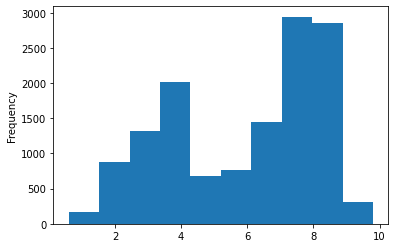

In [750]:
df_netflix['Hidden Gem Score'].plot.hist()

> Score qui determine la note d'un film selon sa note d'évaluation par rapport à sa popularité

## Corrélation sur tous les scores present dans le dataset

In [751]:
corr = df_netflix.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '800px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '800px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
Hidden Gem Score,1.00,0.12,0.40,0.52,-0.11
IMDb Score,0.12,1.00,0.71,0.72,0.29
Rotten Tomatoes Score,0.40,0.71,1.00,0.90,0.30
Metacritic Score,0.52,0.72,0.90,1.00,0.43
Awards Received,-0.11,0.29,0.30,0.43,1.00


> Il y a une corrélation plus présente dans le Score Metacritique et le score rotten tomatoes

## Analyse du temps de durée du contenu présent

In [752]:
df_netflix.Runtime.value_counts(normalize=True)*100

1-2 hour        58.924995
< 30 minutes    25.815621
> 2 hrs         13.101622
30-60 mins       2.157762
Name: Runtime, dtype: float64

In [753]:
df_netflix['Series or Movie'].value_counts(normalize=True)*100

Movie     75.562016
Series    24.437984
Name: Series or Movie, dtype: float64

In [754]:
df_netflix = df_netflix.dropna()

In [755]:
df_netflix.dtypes

Genre                     object
Languages                 object
Series or Movie           object
Hidden Gem Score         float64
Country Availability      object
Runtime                   object
Director                  object
Writer                    object
Actors                    object
View Rating               object
IMDb Score               float64
Rotten Tomatoes Score    float64
Metacritic Score         float64
Awards Received          float64
Boxoffice                 object
Release Date              object
Netflix Release Date      object
Production House          object
dtype: object

In [756]:
le = LabelEncoder()

for col in df_netflix.columns : 
    if df_netflix[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        df_netflix[col] = le.fit_transform(df_netflix[col])

df_netflix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Genre
Languages
Series or Movie
Country Availability
Runtime
Director
Writer
Actors
View Rating
Boxoffice
Release Date
Netflix Release Date
Production House


,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,435,500,1,4.3,1335,1,1140,961,1217,9,7.9,98.0,82.0,74.0,736,508,715,260
1,357,22,0,7.0,123,0,204,258,1605,9,5.8,79.0,69.0,1.0,1915,332,715,565
15,452,22,0,3.5,792,0,1127,1681,1040,9,8.4,68.0,59.0,112.0,1215,169,714,241
16,54,311,0,2.8,793,0,378,697,1259,6,6.5,52.0,51.0,26.0,1510,870,714,905
17,216,22,0,4.4,794,0,261,1778,1678,7,8.1,96.0,85.0,46.0,1315,660,714,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15456,394,159,0,2.7,426,0,907,707,1836,7,6.8,45.0,48.0,6.0,306,555,0,331
15457,437,22,0,2.5,1184,2,963,73,1188,7,6.8,36.0,48.0,1.0,2048,1319,0,1549
15459,320,187,0,3.0,681,0,238,1089,875,7,6.8,63.0,52.0,3.0,138,1203,0,1287
15460,219,266,0,2.0,180,2,118,1764,240,7,4.9,25.0,45.0,11.0,1037,830,0,1494


In [757]:
corr = df_netflix.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '400px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '800px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
Genre,1.00,-0.08,-0.01,0.16,0.03,-0.07,-0.04,-0.02,-0.02,0.14,0.09,0.11,0.14,0.09,-0.01,-0.02,0.06,-0.02
Languages,-0.08,1.00,0.02,0.14,0.00,0.08,0.01,0.00,0.03,-0.02,0.15,0.12,0.13,0.08,-0.04,0.03,0.05,-0.06
Series or Movie,-0.01,0.02,1.00,0.03,0.01,0.07,0.04,0.00,-0.02,-0.00,0.04,0.03,0.03,0.02,0.00,0.01,0.22,0.00
Hidden Gem Score,0.16,0.14,0.03,1.00,0.04,0.11,-0.03,0.00,0.06,0.01,0.54,0.76,0.71,0.27,-0.07,-0.05,0.21,-0.03
Country Availability,0.03,0.00,0.01,0.04,1.00,-0.00,0.01,-0.01,0.05,-0.03,0.06,0.06,0.04,0.03,-0.02,0.01,0.01,-0.06
Runtime,-0.07,0.08,0.07,0.11,-0.00,1.00,0.02,-0.00,0.01,0.06,0.29,0.16,0.20,0.21,0.00,-0.01,-0.03,0.01
Director,-0.04,0.01,0.04,-0.03,0.01,0.02,1.00,0.28,-0.01,-0.00,0.02,-0.01,-0.01,-0.02,-0.02,0.01,-0.05,-0.04
Writer,-0.02,0.00,0.00,0.00,-0.01,-0.00,0.28,1.00,0.02,0.03,0.05,0.03,0.04,0.01,0.01,0.02,-0.04,-0.03
Actors,-0.02,0.03,-0.02,0.06,0.05,0.01,-0.01,0.02,1.00,-0.01,0.05,0.06,0.05,0.03,-0.00,-0.02,0.02,-0.02
View Rating,0.14,-0.02,-0.00,0.01,-0.03,0.06,-0.00,0.03,-0.01,1.00,0.06,0.04,0.05,0.07,0.03,-0.02,0.06,-0.04


> Un point clés de notre dataset, très peu de variable sont fortement corélées, de ce fait peut de résultats seront utilisable.

# Arbre de Décision

## Préparation des variables pour l'apprentissage de l'algorithme des arbres de décision

In [758]:
x= df_netflix.drop('Series or Movie',axis=1)
y = df_netflix['Series or Movie']

In [759]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

> Avec stratification, impossible car plus de 2 valeurs

In [760]:
y_train.value_counts(normalize=True)*100

0    97.927461
1     2.072539
Name: Series or Movie, dtype: float64

In [761]:
y_test.value_counts(normalize=True)*100

0    97.927461
1     2.072539
Name: Series or Movie, dtype: float64

In [762]:
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [763]:
df_netflix.isna().sum()

Genre                    0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View Rating              0
IMDb Score               0
Rotten Tomatoes Score    0
Metacritic Score         0
Awards Received          0
Boxoffice                0
Release Date             0
Netflix Release Date     0
Production House         0
dtype: int64

In [764]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [765]:
y_pred = tree.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [766]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [767]:
score = tree.score(x_test, y_test)
score

0.9896373056994818

> Ici on peut voir que le score maximal atteint par l'algorithme est de 98.96%

In [768]:
scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(x_train, y_train)
    score=tree.score(x_test, y_test)
    scores.append(score*100)

scores

[97.58203799654576,
 98.61830742659758,
 98.61830742659758,
 97.92746113989638,
 97.75474956822107,
 98.96373056994818,
 98.96373056994818,
 98.96373056994818]

> Ici on peut voir que le score maximal peut être atteint à la profodeur 7

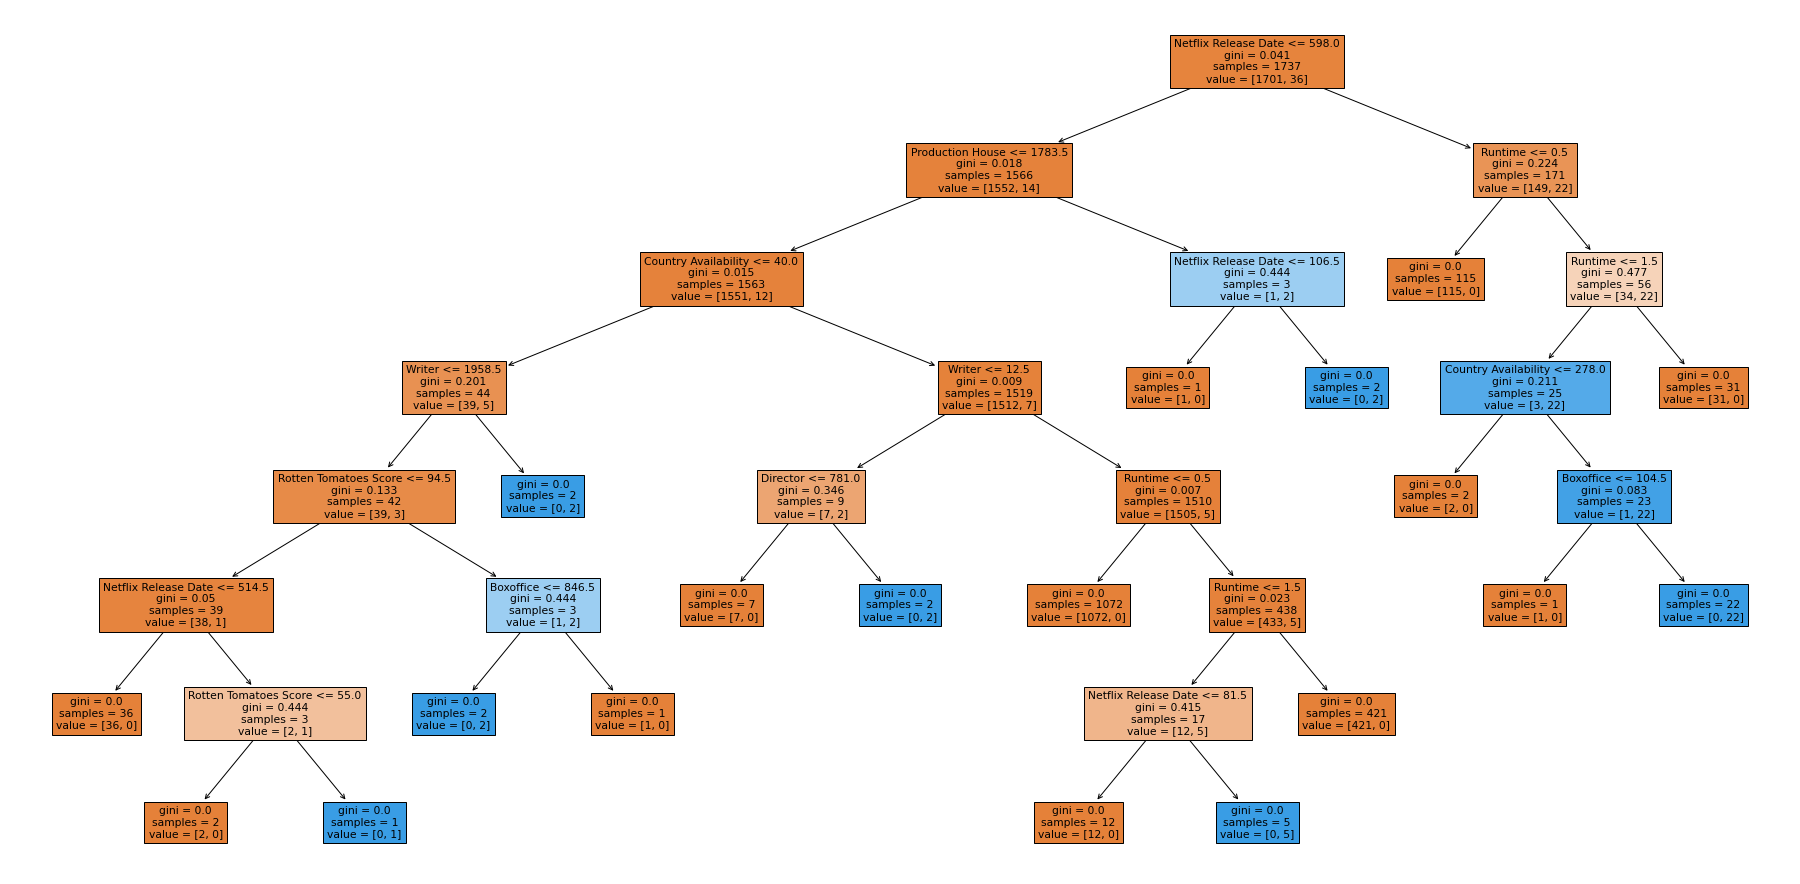

In [774]:
tree=DecisionTreeClassifier(max_depth=7, random_state=42)
tree.fit(x_train, y_train)
plt.figure(figsize = (32, 16))

tree_ban_tcg = plot_tree(tree,
                         feature_names=x_train.columns,
                         filled=True)

# Application du KMeans avec Test Concluant

In [613]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site','Title'],axis=1)
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


In [614]:
df_netflix = df_netflix.set_index('Runtime')

In [615]:
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
Runtime,,,,,,,,,,,,,,,,,
< 30 minutes,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1-2 hour,Comedy,English,Movie,7.0,Canada,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
1-2 hour,"Drama, Thriller",English,Movie,6.4,Canada,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
< 30 minutes,Drama,Turkish,Series,7.7,"Belgium,Netherlands",NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
1-2 hour,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
< 30 minutes,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
< 30 minutes,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
< 30 minutes,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN


In [616]:
df_netflix = df_netflix.drop(['Genre','Languages','Series or Movie','Country Availability','Director','Writer','Actors','View Rating','Boxoffice','Release Date','Netflix Release Date','Production House'],axis=1)

df_netflix = df_netflix.dropna()


In [617]:
df_netflix.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,3.724778,6.766228,66.415926,60.834696,12.169925
std,1.503514,0.908129,25.652213,17.069956,23.455633
min,0.600000,1.600000,0.000000,6.000000,1.000000
25%,2.800000,6.200000,49.000000,49.000000,2.000000
50%,3.600000,6.800000,74.000000,62.000000,4.000000
75%,4.200000,7.400000,88.000000,73.000000,12.000000
max,9.200000,9.300000,100.000000,100.000000,300.000000


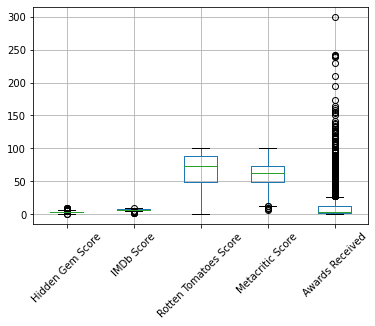

In [618]:
df_netflix.boxplot(rot=45)

In [619]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for col in df_netflix.columns : 
#     if df_netflix[col].dtypes == 'object' : 
#         print(col)
#         le = LabelEncoder()
#         df_netflix[col] = le.fit_transform(df_netflix[col])
# df_netflix

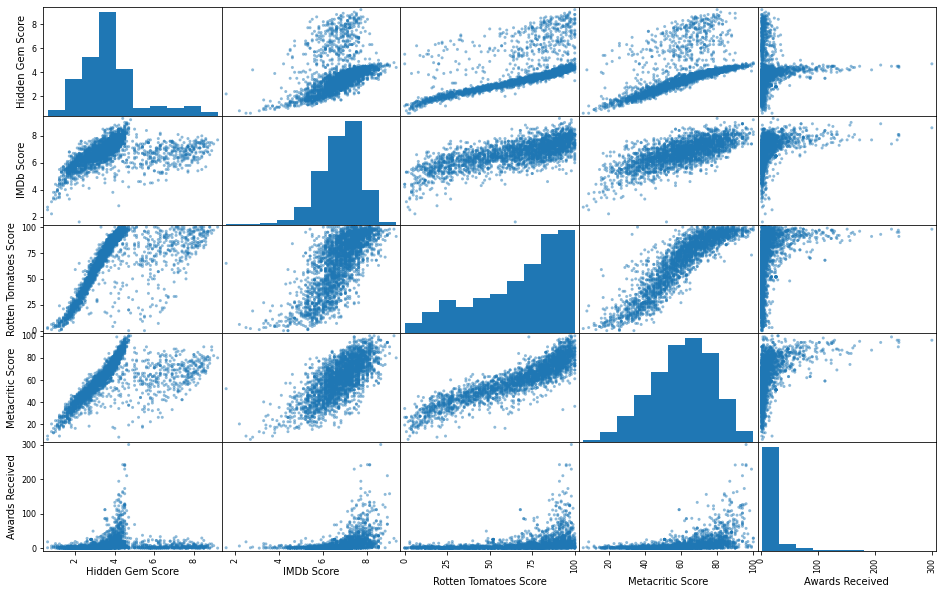

In [620]:
scatter_mat = scatter_matrix(df_netflix, figsize = (16,10))

In [621]:
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(df_netflix)
df_minmax
df_scale = scale(df_netflix)


In [622]:
pd.DataFrame(df_minmax, columns=df_netflix.columns, index=df_netflix.index)

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
Runtime,,,,,
< 30 minutes,0.430233,0.818182,0.98,0.808511,0.244147
1-2 hour,0.744186,0.545455,0.79,0.670213,0.000000
1-2 hour,0.337209,0.883117,0.68,0.563830,0.371237
1-2 hour,0.255814,0.636364,0.52,0.478723,0.083612
1-2 hour,0.441860,0.844156,0.96,0.840426,0.150502
...,...,...,...,...,...
1-2 hour,0.279070,0.675325,0.63,0.489362,0.006689
> 2 hrs,0.162791,0.428571,0.25,0.414894,0.033445
1-2 hour,0.081395,0.480519,0.02,0.170213,0.000000


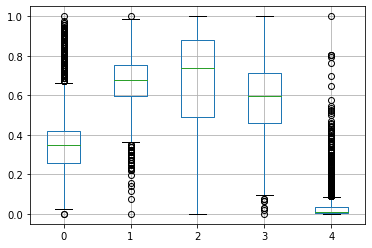

In [623]:
pd.DataFrame(df_minmax).boxplot()

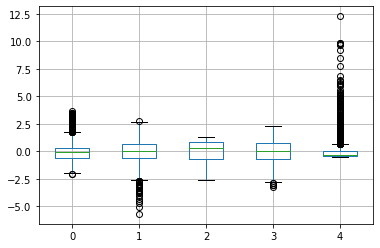

In [624]:
pd.DataFrame(df_scale).boxplot()

In [625]:
kmeans_minmax = cluster.KMeans(n_clusters=3, random_state=42)
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=3, random_state=42)

In [626]:
kmeans_minmax.labels_

array([0, 0, 2, ..., 1, 1, 0], dtype=int32)

In [627]:
kmeans_minmax.inertia_,

(134.77250106021793,)

In [628]:
kmeans_orig = cluster.KMeans(n_clusters=3, random_state=42)
kmeans_orig.fit(df_netflix)
kmeans_orig.labels_

array([1, 0, 1, ..., 2, 2, 0], dtype=int32)

In [629]:
df_netflix['cl_minmax']=kmeans_minmax.labels_
df_netflix.sort_values('cl_minmax')
df_netflix.sort_values('cl_minmax')

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,cl_minmax
Runtime,,,,,,
< 30 minutes,4.3,7.9,98.0,82.0,74.0,0
1-2 hour,3.7,6.7,85.0,70.0,2.0,0
> 2 hrs,4.5,8.1,91.0,97.0,20.0,0
> 2 hrs,3.8,7.2,82.0,76.0,9.0,0
> 2 hrs,4.5,8.3,98.0,86.0,13.0,0
...,...,...,...,...,...,...
1-2 hour,2.9,6.3,59.0,54.0,1.0,2
> 2 hrs,3.3,6.9,69.0,62.0,1.0,2
1-2 hour,2.9,6.4,50.0,58.0,3.0,2


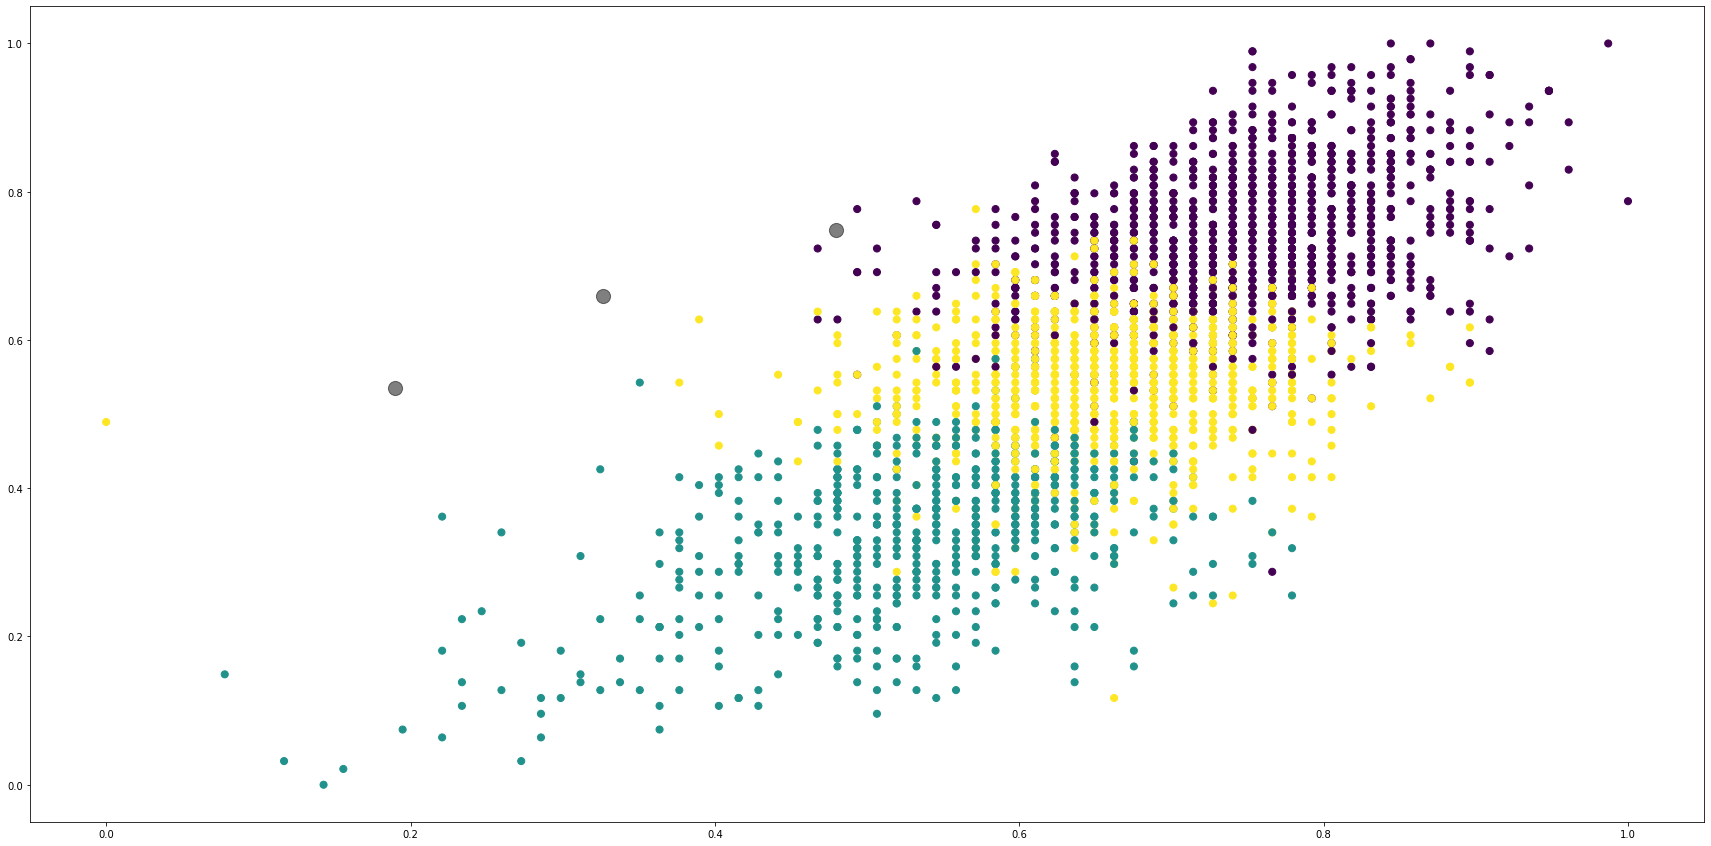

In [630]:
y_kmeans = kmeans_minmax.predict(df_minmax)
centers = kmeans_minmax.cluster_centers_
plt.figure(figsize=(30,15))
# Voir au travers des df les colonnes les plus corélées
plt.scatter(df_minmax[ : , 1], df_minmax[ : , 3], c=y_kmeans, s=50, cmap='viridis')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Application du KMeans avec Test Non Concluant

In [631]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site','Title'],axis=1)
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


In [632]:
df_netflix = df_netflix.set_index('Runtime')


In [633]:
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
Runtime,,,,,,,,,,,,,,,,,
< 30 minutes,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1-2 hour,Comedy,English,Movie,7.0,Canada,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
1-2 hour,"Drama, Thriller",English,Movie,6.4,Canada,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
< 30 minutes,Drama,Turkish,Series,7.7,"Belgium,Netherlands",NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
1-2 hour,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
< 30 minutes,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
< 30 minutes,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
< 30 minutes,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN


In [634]:
# df_netflix = df_netflix.drop(['Genre','Languages','Series or Movie','Country Availability','Director','Writer','Actors','View Rating','Boxoffice','Release Date','Netflix Release Date','Production House'],axis=1)
le = LabelEncoder()

for col in df_netflix.columns : 
    if df_netflix[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        df_netflix[col] = le.fit_transform(df_netflix[col])

df_netflix = df_netflix.dropna()

Genre
Languages
Series or Movie
Country Availability
Director
Writer
Actors
View Rating
Boxoffice
Release Date
Netflix Release Date
Production House


In [635]:
df_netflix.describe()

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,990.381088,380.988980,0.021685,3.724778,4086.190899,3280.750089,4805.349804,6253.295414,14.056168,6.766228,66.415926,60.834696,12.169925,2117.818343,2790.521152,504.186989,2093.002133
std,528.057707,338.293161,0.145679,1.503514,2140.134238,1930.601323,2828.816276,3712.465299,3.312501,0.908129,25.652213,17.069956,23.455633,1216.806919,1480.452734,603.154474,1172.123465
min,0.000000,6.000000,0.000000,0.600000,1.000000,8.000000,0.000000,4.000000,1.000000,1.600000,0.000000,6.000000,1.000000,2.000000,9.000000,0.000000,5.000000
25%,398.000000,135.000000,0.000000,2.800000,2215.000000,1540.000000,2329.000000,3052.000000,13.000000,6.200000,49.000000,49.000000,2.000000,1019.000000,1566.000000,0.000000,1033.000000
50%,1155.000000,149.000000,0.000000,3.600000,4055.000000,3055.000000,4549.000000,5997.000000,13.000000,6.800000,74.000000,62.000000,4.000000,2118.000000,2891.000000,190.000000,2149.000000
75%,1464.000000,625.000000,0.000000,4.200000,6030.000000,4957.000000,7275.000000,9412.000000,15.000000,7.400000,88.000000,73.000000,12.000000,3247.000000,4037.000000,1001.000000,3152.000000
max,1778.000000,1437.000000,1.000000,9.200000,7530.000000,6746.000000,9650.000000,12934.000000,28.000000,9.300000,100.000000,100.000000,300.000000,3836.000000,5312.000000,1822.000000,3814.000000


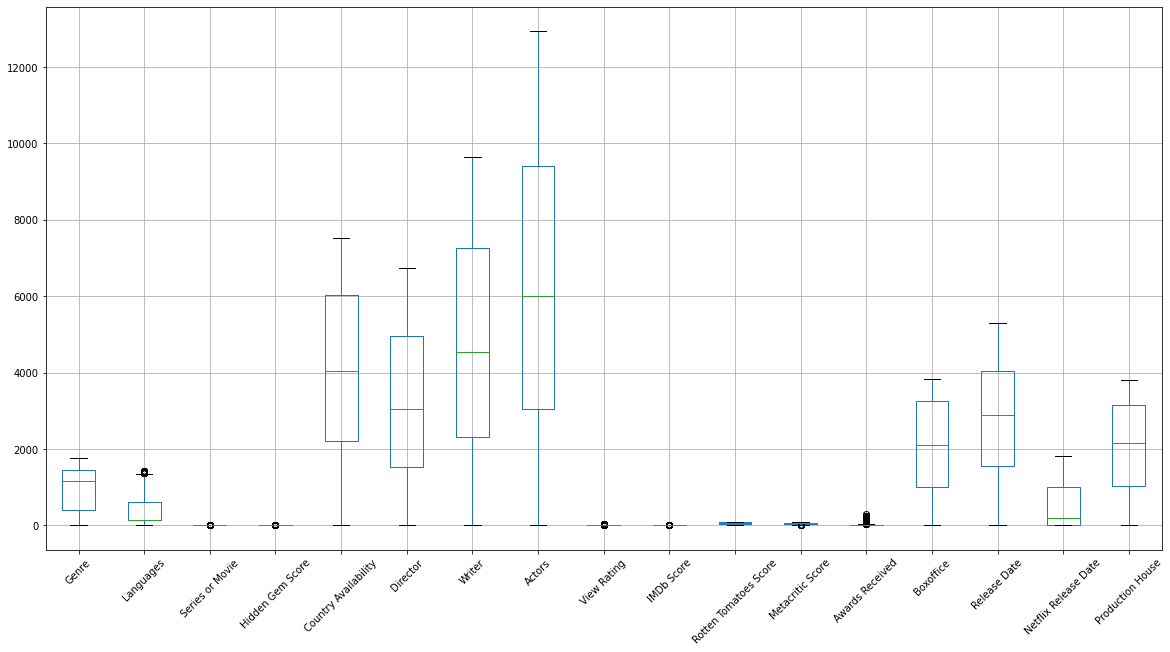

In [636]:
df_netflix.boxplot(rot=45,figsize=(20,10))

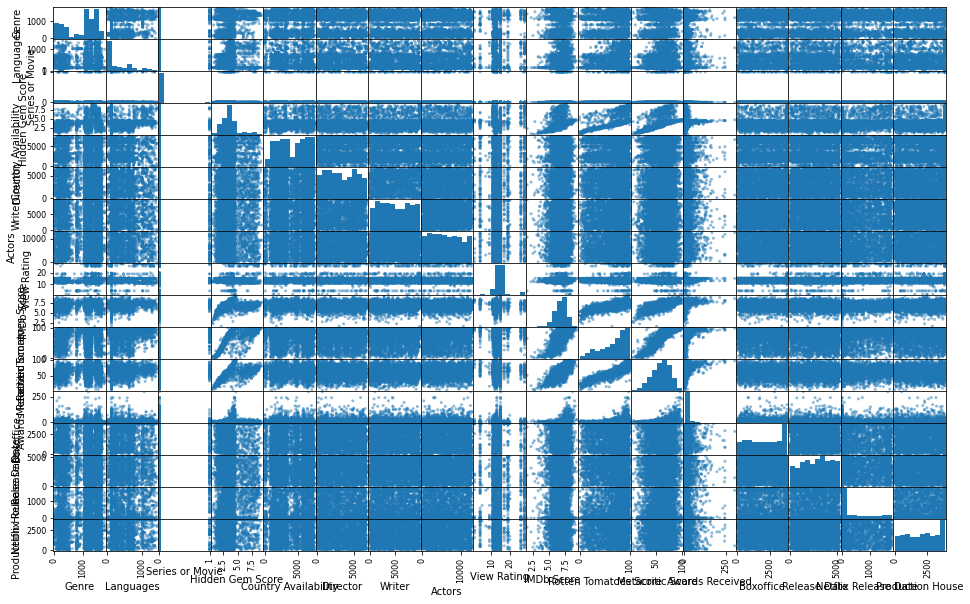

In [637]:
scatter_mat = scatter_matrix(df_netflix, figsize = (16,10))

In [638]:
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(df_netflix)
df_minmax
df_scale = scale(df_netflix)


In [639]:
pd.DataFrame(df_minmax, columns=df_netflix.columns, index=df_netflix.index)

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
Runtime,,,,,,,,,,,,,,,,,
< 30 minutes,0.724409,0.953878,1.0,0.430233,0.879400,0.923271,0.444663,0.531168,0.518519,0.818182,0.98,0.808511,0.244147,0.313772,0.386385,1.000000,0.145445
1-2 hour,0.628796,0.090147,0.0,0.744186,0.173197,0.162066,0.129948,0.716937,0.518519,0.545455,0.79,0.670213,0.000000,0.874022,0.270790,1.000000,0.308480
1-2 hour,0.742970,0.090147,0.0,0.337209,0.527294,0.917335,0.834093,0.436968,0.518519,0.883117,0.68,0.563830,0.371237,0.548513,0.143692,0.999451,0.133106
1-2 hour,0.082677,0.432565,0.0,0.255814,0.527959,0.291481,0.309741,0.550271,0.407407,0.636364,0.52,0.478723,0.083612,0.692749,0.632095,0.999451,0.509057
1-2 hour,0.281777,0.090147,0.0,0.441860,0.528224,0.206144,0.880518,0.754060,0.444444,0.844156,0.96,0.840426,0.150502,0.598070,0.499340,0.999451,0.395379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-2 hour,0.593363,0.289308,0.0,0.279070,0.442157,0.197091,0.490466,0.383759,0.444444,0.675325,0.63,0.489362,0.006689,0.069901,0.832548,0.000000,0.719611
> 2 hrs,0.284027,0.385045,0.0,0.162791,0.196042,0.100772,0.878549,0.110828,0.444444,0.428571,0.25,0.414894,0.033445,0.459311,0.604375,0.000000,0.846679
1-2 hour,0.119798,0.090147,0.0,0.081395,0.173197,0.462600,0.559896,0.446172,0.444444,0.480519,0.02,0.170213,0.000000,0.428534,0.876674,0.000000,0.475453


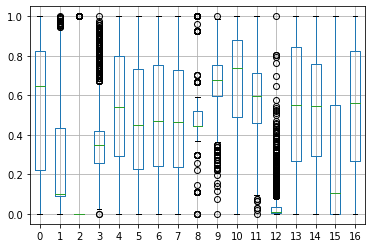

In [640]:
pd.DataFrame(df_minmax).boxplot()

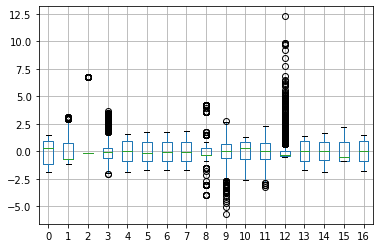

In [641]:
pd.DataFrame(df_scale).boxplot()

In [642]:
kmeans_minmax = cluster.KMeans(n_clusters=3, random_state=42)
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=3, random_state=42)

In [643]:
kmeans_minmax.labels_

array([0, 0, 0, ..., 1, 1, 2], dtype=int32)

In [644]:
kmeans_minmax.inertia_,

(2459.7511413869042,)

In [645]:
kmeans_orig = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_orig.fit(df_netflix)
kmeans_orig.labels_

array([1, 0, 3, ..., 3, 2, 1], dtype=int32)

In [646]:
df_netflix['cl_minmax']=kmeans_minmax.labels_
df_netflix.sort_values('cl_minmax')
df_netflix.sort_values('cl_minmax')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House,cl_minmax
Runtime,,,,,,,,,,,,,,,,,,
< 30 minutes,1288,1371,1,4.3,6622,6229,4291,6872,15,7.9,98.0,82.0,74.0,1205,2058,1822,559,0
1-2 hour,1464,135,0,4.0,1565,4732,9630,1827,13,6.8,93.0,80.0,6.0,24,103,1201,2974,0
1-2 hour,1341,135,0,4.2,4277,4971,7285,2420,12,7.1,99.0,80.0,6.0,3836,185,1201,273,0
> 2 hrs,394,1151,0,3.1,2855,1860,3088,7592,19,6.0,70.0,57.0,33.0,2759,841,1200,377,0
< 30 minutes,1315,662,1,3.7,7278,4954,7274,12310,15,7.8,74.0,68.0,42.0,2881,5102,1196,67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
> 2 hrs,1532,1025,0,4.4,5802,6685,9511,4541,28,8.1,99.0,82.0,38.0,2943,376,0,1472,2
1-2 hour,483,1289,0,7.1,4408,676,970,4045,13,5.9,68.0,56.0,1.0,112,409,0,1850,2
1-2 hour,1671,690,0,3.5,7200,1965,2976,11007,15,6.2,74.0,71.0,2.0,1320,4181,0,274,2


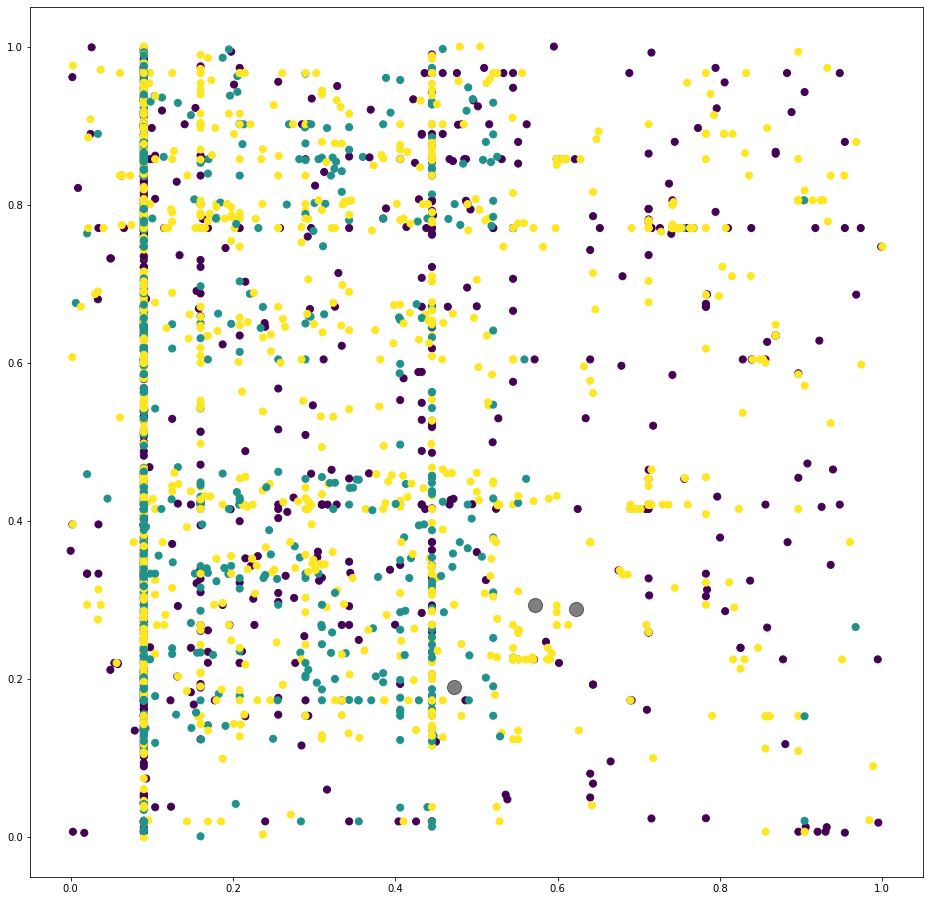

In [647]:
y_kmeans = kmeans_minmax.predict(df_minmax)
centers = kmeans_minmax.cluster_centers_
plt.figure(figsize=(16,16))
plt.scatter(df_minmax[ : , 1], df_minmax[ : , 4], c=y_kmeans, s=50, cmap='viridis')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Knn 

In [648]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site','Title'],axis=1)
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


In [649]:
df_netflix = df_netflix.drop(['Genre','Languages','Series or Movie','Country Availability','Director','Writer','Actors','View Rating','Boxoffice','Release Date','Netflix Release Date','Production House'],axis=1)

df_netflix = df_netflix.dropna()

In [650]:
target_name = ['< 30 minutes','1-2 hour','> 2 hrs']


In [651]:
x= df_netflix.drop('Runtime',axis=1)
y= df_netflix["Runtime"]

In [652]:
x.shape, y.shape 

((2813, 5), (2813,))

In [653]:
pd.value_counts(y, normalize=True).round(2) * 100 

1-2 hour        71.0
> 2 hrs         26.0
< 30 minutes     3.0
Name: Runtime, dtype: float64

In [654]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_netflix.columns : 
    if df_netflix[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        df_netflix[col] = le.fit_transform(df_netflix[col])


Runtime


In [655]:
df_netflix.Runtime.value_counts(normalize=True)*100

0    70.814077
2    26.270885
1     2.915037
Name: Runtime, dtype: float64

In [656]:
km = KMeans(n_clusters=3, random_state=42)
km
km.fit(x)

KMeans(n_clusters=3, random_state=42)

In [657]:
label_orig = '1-2 hour' '> 2 hrs ' '< 30 minutes'
km.labels_

array([1, 0, 1, ..., 2, 2, 0], dtype=int32)

In [658]:
df_netflix['cl_km'] = km.labels_
df_netflix['cl_km'] = df_netflix['cl_km'].replace({1:'< 30 minutes', 0:'1-2 hour', 2:'> 2 hrs'})
df_netflix['Runtime'] = df_netflix['Runtime'].replace({1:'< 30 minutes', 0:'1-2 hour', 2:'> 2 hrs'})
df_netflix

,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,cl_km
0,4.3,< 30 minutes,7.9,98.0,82.0,74.0,< 30 minutes
1,7.0,1-2 hour,5.8,79.0,69.0,1.0,1-2 hour
15,3.5,1-2 hour,8.4,68.0,59.0,112.0,< 30 minutes
16,2.8,1-2 hour,6.5,52.0,51.0,26.0,> 2 hrs
17,4.4,1-2 hour,8.1,96.0,85.0,46.0,1-2 hour
...,...,...,...,...,...,...,...
15459,3.0,1-2 hour,6.8,63.0,52.0,3.0,1-2 hour
15460,2.0,> 2 hrs,4.9,25.0,45.0,11.0,> 2 hrs
15461,1.3,1-2 hour,5.3,2.0,22.0,1.0,> 2 hrs
15463,1.6,1-2 hour,6.1,8.0,29.0,1.0,> 2 hrs


In [659]:
pd.crosstab(df_netflix['Runtime'], df_netflix['cl_km'], margins=True)

cl_km,1-2 hour,< 30 minutes,> 2 hrs,All
Runtime,,,,
1-2 hour,1165,61,766,1992
< 30 minutes,55,3,24,82
> 2 hrs,499,69,171,739
All,1719,133,961,2813


In [660]:
le = LabelEncoder()

for col in df_netflix.columns : 
    if df_netflix[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        df_netflix[col] = le.fit_transform(df_netflix[col])
x= df_netflix.drop('Runtime',axis=1)
y= df_netflix["Runtime"]

Runtime
cl_km


In [661]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, stratify=y, random_state=42)

In [662]:
pd.DataFrame(y_test)

,Runtime
14121,0
7676,0
14321,0
11926,0
11257,2
...,...
15162,0
10862,0
14600,0
1331,0


In [663]:
pd.Series(y_train).value_counts(normalize=True)*100

0    70.826667
2    26.240000
1     2.933333
Name: Runtime, dtype: float64

In [664]:
pd.Series(y_test).value_counts(normalize=True)*100

0    70.788913
2    26.332623
1     2.878465
Name: Runtime, dtype: float64

In [665]:
print(x_train.shape) ; print(y_train.shape) ; print(x_test.shape) ; print(y_test.shape)

(1875, 6)
(1875,)
(938, 6)
(938,)


In [666]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn1

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [667]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [668]:
knn1.kneighbors()

(array([[1.73493516],
        [1.74642492],
        [1.41774469],
        ...,
        [6.59545298],
        [1.08166538],
        [1.41421356]]), array([[ 493],
        [  23],
        [ 164],
        ...,
        [1008],
        [ 972],
        [ 752]]))

In [669]:
dist = pd.DataFrame(knn1.kneighbors()[0], columns=['dist'])
dist['neighbor']=knn1.kneighbors()[1]
# dist.sort_values('dist',ascending=False)

In [670]:
y_pred = knn1.predict(x_test)
y_pred

array([2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [671]:
y_test

14121    0
7676     0
14321    0
11926    0
11257    2
        ..
15162    0
10862    0
14600    0
1331     0
3807     2
Name: Runtime, Length: 938, dtype: int64

In [672]:
acc = knn1.score(x_test, y_test)
acc

0.6396588486140725

In [673]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[511,  15, 138],
       [ 19,   2,   6],
       [150,  10,  87]])

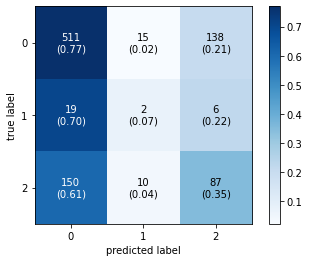

In [674]:
class_names_target = target_name

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,)

In [675]:
conf_mat.diagonal().sum()/conf_mat.sum()

0.6396588486140725

In [676]:
err = 1 - acc
err * 100

36.034115138592746

In [677]:
err_default = 6
#range de la boucle
neighbors = range(2, 101)
errors = []

for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1) 	# 
	knn.fit(x_train, y_train)
	err = round((1.0 - knn.score(x_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\n\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')



Results : knn = 2 => err_test = 30.81

Improvement of -24.81%




Results : knn = 3 => err_test = 32.942

Improvement of -26.942%




Results : knn = 4 => err_test = 29.638

Improvement of -23.638%




Results : knn = 5 => err_test = 30.277

Improvement of -24.277%




Results : knn = 6 => err_test = 29.211

Improvement of -23.211%




Results : knn = 7 => err_test = 29.104

Improvement of -23.104%




Results : knn = 8 => err_test = 28.358

Improvement of -22.358%




Results : knn = 9 => err_test = 28.678

Improvement of -22.678%




Results : knn = 10 => err_test = 28.785

Improvement of -22.785%




Results : knn = 11 => err_test = 29.104

Improvement of -23.104%




Results : knn = 12 => err_test = 29.104

Improvement of -23.104%




Results : knn = 13 => err_test = 28.998

Improvement of -22.998%




Results : knn = 14 => err_test = 29.104

Improvement of -23.104%




Results : knn = 15 => err_test = 28.785

Improvement of -22.785%




Results : knn = 16 => err_test = 28.998

I

Text(0.5, 0, 'neighbors')

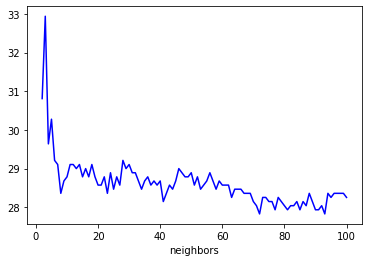

In [678]:
plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')

In [679]:
rf_netflix = pd.DataFrame({"neighbors" : neighbors, "errors" : errors})
rf_netflix = rf_netflix.sort_values('errors', ascending=True)
rf_netflix = rf_netflix.sort_values(['errors', 'neighbors'], ascending=[True, False])
rf_netflix.head(15)

,neighbors,errors
91,93,27.825
70,72,27.825
89,91,27.932
88,90,27.932
83,85,27.932
79,81,27.932
75,77,27.932
90,92,28.038
85,87,28.038
81,83,28.038


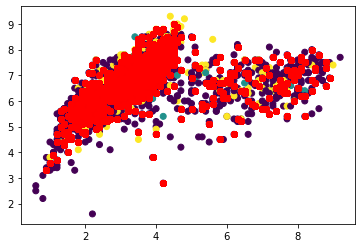

In [680]:
plt.figure()
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y)
# indice des points mal classés par le clf
miss_class = np.where(y_test != y_pred)
miss_class = miss_class[0].tolist()
# les points mal classés (en rouge)
for idx in miss_class : 
    plt.scatter(x_test.iloc[idx:, 0], x_test.iloc[idx:, 1], c = 'red')

In [681]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn1.fit(x_train.iloc[:, [0, 1]], y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


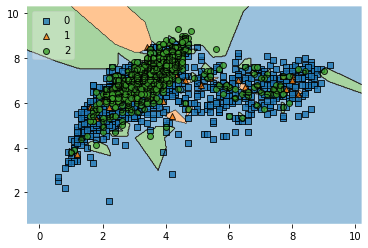

In [682]:
#par défaut
plot_decision_regions(np.array(x.iloc[:, [0, 1]]), np.array(y), clf=knn1, legend=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


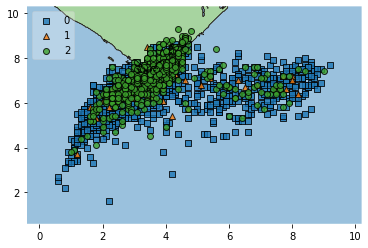

In [683]:
knn90=KNeighborsClassifier(n_neighbors=90, n_jobs=-1)
knn90.fit(x_train.iloc[:, [0, 1]], y_train)
plot_decision_regions(np.array(x.iloc[:, [0, 1]]), np.array(y), clf=knn90, legend=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


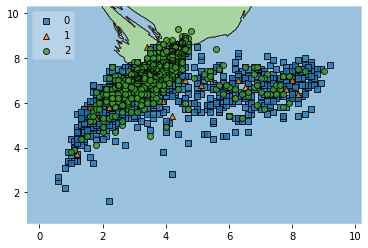

In [684]:
knn21=KNeighborsClassifier(n_neighbors=23, n_jobs=-1)
knn21.fit(x_train.iloc[:, [0, 1]], y_train)
plot_decision_regions(np.array(x.iloc[:, [0, 1]]), np.array(y), clf=knn21, legend=2)

> Après différent test, nous avons ramener l'étude sur un échantillion contenant 23 neighbors. 23 étant notre meilleur point résultat.

# Random Forest

In [685]:
x = x.drop('cl_km',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [686]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [687]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [688]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

In [689]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat
pd.DataFrame(conf_mat, columns=target_name, index=target_name)

,< 30 minutes,1-2 hour,> 2 hrs
< 30 minutes,354,5,40
1-2 hour,12,0,4
> 2 hrs,101,4,43


(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4042ffd850>)

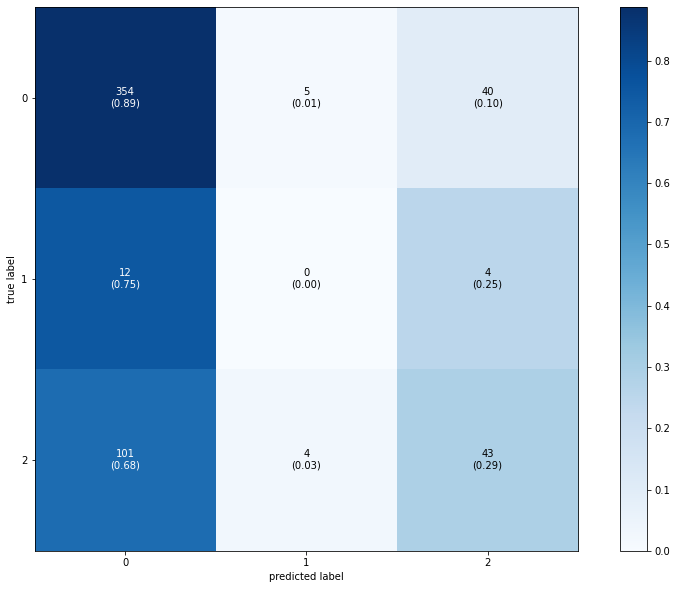

In [690]:
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                figsize=(15,10))

In [691]:
(1 - metrics.accuracy_score(y_test, y_pred)) * 100

29.484902309058615

In [692]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [693]:
n_estimators = np.linspace(start = 1, stop = 100, num = 66, dtype = int)
n_estimators

array([  1,   2,   4,   5,   7,   8,  10,  11,  13,  14,  16,  17,  19,
        20,  22,  23,  25,  26,  28,  29,  31,  32,  34,  36,  37,  39,
        40,  42,  43,  45,  46,  48,  49,  51,  52,  54,  55,  57,  58,
        60,  61,  63,  64,  66,  68,  69,  71,  72,  74,  75,  77,  78,
        80,  81,  83,  84,  86,  87,  89,  90,  92,  93,  95,  96,  98,
       100])

In [694]:
err_default = 9.99
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(x_train, y_train)
   err = round((1.0 - rf.score(x_test, y_test)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 38.366


Improvement of -28.38%.


Results : n_estimators = 2 => err_test = 30.018


Improvement of -20.03%.


Results : n_estimators = 4 => err_test = 30.728


Improvement of -20.74%.


Results : n_estimators = 5 => err_test = 31.794


Improvement of -21.80%.


Results : n_estimators = 7 => err_test = 33.037


Improvement of -23.05%.


Results : n_estimators = 8 => err_test = 30.906


Improvement of -20.92%.


Results : n_estimators = 10 => err_test = 31.083


Improvement of -21.09%.


Results : n_estimators = 11 => err_test = 30.018


Improvement of -20.03%.


Results : n_estimators = 13 => err_test = 29.307


Improvement of -19.32%.


Results : n_estimators = 14 => err_test = 30.018


Improvement of -20.03%.


Results : n_estimators = 16 => err_test = 29.663


Improvement of -19.67%.


Results : n_estimators = 17 => err_test = 30.373


Improvement of -20.38%.


Results : n_estimators = 19 => err_test = 30.195


Improvement of -20.20%.


Res

Text(0, 0.5, 'err_test')

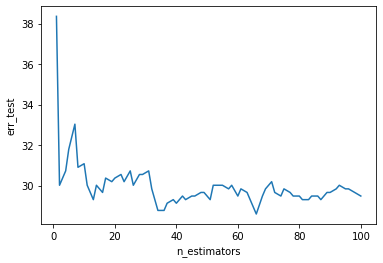

In [695]:
plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')

> Grâce à l'étude d'estimation et au graphe on peut voir que le plus bas taux atteint est atteint à la 66ème itération

In [696]:
n_estimators = np.linspace(start = 1, stop = 100, num = 66, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred)) * 100, 3)
    errors_test.append(err_test)
    train_pred = rf.predict(x_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(rf.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)
    print(f"\n\nResults : n_estimators = {rf.n_estimators} => acc_oob = {acc_oob}, err_test = {err_test}, err_train = {err_train}\n\n")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 1 => acc_oob = 68.356, err_test = 38.011, err_train = 14.089




Results : n_estimators = 2 => acc_oob = 67.111, err_test = 31.261, err_train = 13.333




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 4 => acc_oob = 65.6, err_test = 30.728, err_train = 9.111




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 5 => acc_oob = 64.622, err_test = 33.57, err_train = 6.133




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 7 => acc_oob = 65.822, err_test = 30.018, err_train = 4.711




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 8 => acc_oob = 66.667, err_test = 29.84, err_train = 4.8




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 10 => acc_oob = 66.133, err_test = 30.195, err_train = 4.133




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 11 => acc_oob = 65.733, err_test = 29.84, err_train = 3.422




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 13 => acc_oob = 67.333, err_test = 28.597, err_train = 3.067




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 14 => acc_oob = 67.067, err_test = 29.307, err_train = 3.556




Results : n_estimators = 16 => acc_oob = 66.667, err_test = 30.906, err_train = 2.889




Results : n_estimators = 17 => acc_oob = 67.644, err_test = 30.728, err_train = 2.622




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 19 => acc_oob = 67.333, err_test = 28.952, err_train = 2.622




Results : n_estimators = 20 => acc_oob = 67.689, err_test = 29.307, err_train = 2.533




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 22 => acc_oob = 67.378, err_test = 30.906, err_train = 2.622




Results : n_estimators = 23 => acc_oob = 68.267, err_test = 29.485, err_train = 2.311




Results : n_estimators = 25 => acc_oob = 68.4, err_test = 29.13, err_train = 2.222




Results : n_estimators = 26 => acc_oob = 68.533, err_test = 30.018, err_train = 2.533




Results : n_estimators = 28 => acc_oob = 68.044, err_test = 29.13, err_train = 2.267




Results : n_estimators = 29 => acc_oob = 68.444, err_test = 30.018, err_train = 2.356




Results : n_estimators = 31 => acc_oob = 68.489, err_test = 28.952, err_train = 2.133




Results : n_estimators = 32 => acc_oob = 69.022, err_test = 28.952, err_train = 2.222




Results : n_estimators = 34 => acc_oob = 69.378, err_test = 30.018, err_train = 2.178




Results : n_estimators = 36 => acc_oob = 69.022, err_test = 28.952, err_train = 2.089




Results : n_estimators = 37 => acc_oob = 68.8, err_test = 28.242, err_train = 2.222




Results : n_es

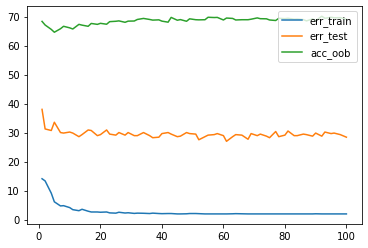

In [697]:
plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [698]:
1-rf.oob_score_

0.3088888888888889

In [699]:
errors = []
err_default = 9.99
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(x_train, y_train)
    err = round((1.0 - rf.score(x_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 29.13

Improvement of -19.14%




Results : max_depth = 2 => err_test = 29.13

Improvement of -19.14%




Results : max_depth = 3 => err_test = 28.242

Improvement of -18.252000000000002%




Results : max_depth = 4 => err_test = 27.353

Improvement of -17.363%




Results : max_depth = 5 => err_test = 26.998

Improvement of -17.008000000000003%




Results : max_depth = 6 => err_test = 27.353

Improvement of -17.363%




Results : max_depth = 7 => err_test = 26.998

Improvement of -17.008000000000003%




Results : max_depth = 8 => err_test = 26.11

Improvement of -16.119999999999997%




Results : max_depth = 9 => err_test = 25.4

Improvement of -15.409999999999998%




Results : max_depth = 10 => err_test = 26.643

Improvement of -16.653%




Results : max_depth = None => err_test = 29.485

Improvement of -19.494999999999997%




Text(0.5, 0, 'max_depths')

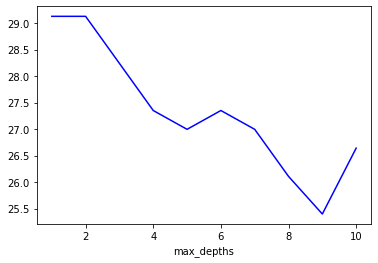

In [710]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

> Grâce au graphe on peut voir que la meilleure profondeur à atteindre est la profondeur 9, mais la meilleure profondeur atteinte au plus tôt est la profondeur 5

In [731]:
param = { "max_features" : list(range(2, 6, 1)), "max_depth" : [2, 3, 4, 5, None] }
param

{'max_depth': [2, 3, 4, 5, None], 'max_features': [2, 3, 4, 5]}

In [732]:
rf = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state = 42),
			        param, cv=5, n_jobs = -1)
rf
rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4, 5]})

In [733]:
pd.DataFrame(rf.cv_results_)[['param_max_features', 'mean_test_score', 'params']].sort_values('mean_test_score',ascending=False)

,param_max_features,mean_test_score,params
12,2,0.718222,"{'max_depth': 5, 'max_features': 2}"
14,4,0.716000,"{'max_depth': 5, 'max_features': 4}"
11,5,0.716000,"{'max_depth': 4, 'max_features': 5}"
13,3,0.715556,"{'max_depth': 5, 'max_features': 3}"
9,3,0.715111,"{'max_depth': 4, 'max_features': 3}"
10,4,0.714222,"{'max_depth': 4, 'max_features': 4}"
4,2,0.714222,"{'max_depth': 3, 'max_features': 2}"
15,5,0.713333,"{'max_depth': 5, 'max_features': 5}"
7,5,0.713333,"{'max_depth': 3, 'max_features': 5}"
8,2,0.713333,"{'max_depth': 4, 'max_features': 2}"


> En combiant les précédents résultats nous voyons que la meilleure ligne du tableau à retenir est la ligne d'index 12 qui nous fourni les résultats suivant : index:12	max_features:2	mean_test_score:0.718222	params:{'max_depth': 5, 'max_features': 2}

In [740]:
rf.score(x_test, y_test), 1-rf.score(x_test, y_test)

(0.7300177619893428, 0.26998223801065724)

In [735]:
if "Runtime" in df_netflix.columns:
  df_netflix = df_netflix.drop('Runtime',axis=1)

In [736]:
df_netflix

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
0,4.3,7.9,98.0,82.0,74.0
1,7.0,5.8,79.0,69.0,1.0
15,3.5,8.4,68.0,59.0,112.0
16,2.8,6.5,52.0,51.0,26.0
17,4.4,8.1,96.0,85.0,46.0
...,...,...,...,...,...
15459,3.0,6.8,63.0,52.0,3.0
15460,2.0,4.9,25.0,45.0,11.0
15461,1.3,5.3,2.0,22.0,1.0
15463,1.6,6.1,8.0,29.0,1.0


In [737]:
rf.best_estimator_.feature_importances_

array([0.16849926, 0.30274535, 0.1418225 , 0.11747026, 0.26946263])

In [738]:
if 'cl_km' in df_netflix.columns :
  df_netflix = df_netflix.drop(["cl_km"],axis=1)

feature_importances = rf.best_estimator_.feature_importances_
pd.DataFrame({'feature' : df_netflix.columns, 'importance' : feature_importances}).sort_values('importance', ascending=False)

,feature,importance
1,IMDb Score,0.302745
4,Awards Received,0.269463
0,Hidden Gem Score,0.168499
2,Rotten Tomatoes Score,0.141822
3,Metacritic Score,0.117470


In [739]:
feature = [column for column in df_netflix]
importance = np.round(rf.best_estimator_.feature_importances_ * 100, 2)
feature, importance
feature_importance = pd.DataFrame({'feature' : df_netflix.columns, 'importance' : importance})
feature_importance

,feature,importance
0,Hidden Gem Score,16.85
1,IMDb Score,30.27
2,Rotten Tomatoes Score,14.18
3,Metacritic Score,11.75
4,Awards Received,26.95


# Conclusion

> Concernant la détection du contenu Netflix afin de savoir si il s'agit d'un film ou d'une série, notre algorithme possède une précision de 98% et a besoin au maximum de 7 interrogations sur le contenu pour pouvoir prédire si celui-ci est un film ou une série.

> Concernant la détection de la durée du contenu, la précision est de 73%. Grâce aux algorithmes nous avons remarqué que le critère le plus déterminant est l'IMDb Score avec une importance de 30% suivi par l'Award Received de 27%.